# Week 12: Correlation, Regression

In [1]:
from datascience import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Correlation 


The *correlation coefficent* or *correlation* tells us how strong of a *linear* (think how well could a line describe model the data) relationship there is between two *continuous* variables. Continuous variables are any variables that can take on any real number. Think decimal values are feasible for the variables being compared. Correlation is often denoted as $r$.

Key points about the value of $r$ (Data 8 Textbook 15.1.1):
* Between -1 and 1.
* measures the extent to which the scatter plot clusters around a straight line.
* $r = 1$ if the scatter diagram is a perfect straight line sloping upwards, and $r = -1$ if the scatter diagram is a perfect straight line sloping downwards.

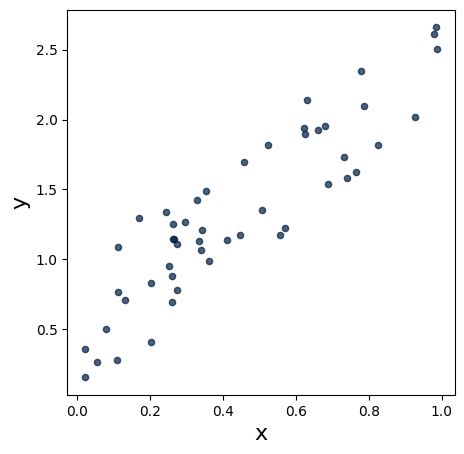

In [14]:
x = np.random.rand(50)
y = x * 2 + np.random.rand(50)

random_numbers = Table().with_columns("x",x, "y", y)
random_numbers.scatter("x", "y")

How do we find $r$? Convert all values to standard units and then multiply the means of now standardized variable.

What are standard units? Each value of a variable has a particular unit, i.e. lbs or inches. These units are all different so maybe there is a way to compare these units in a "standard" way. To convert a value $x_1$ to standard units where $x_1$ is part of the data from the array $x$ we do the following:

$z_1 = \frac{x_1 - mean(x)}{std(x)}$

where $z_1$ is $x_1$ in standard units. 

**Let's try converting x and y into standard units**

In [23]:
x_standard = (x - np.mean(x)) / np.std(x)
y_standard = (y - np.mean(y)) / np.std(y)

**Now that you have the standardized variables how do we find the correlation between x and y?**

In [29]:
r = np.mean(x_standard*y_standard)

assert np.isclose(r, np.corrcoef(x,y)[0][1])

### Linear Regression

Linear regression is a form of machine learning that uses linear models for prediction of continuous values. The correlation coefficient is incredibly important for linear regression as it is the slope of the line that minimizes the error for two variables that are in standard units. The error we want to minimize is the sum of squared differences. The regression line minimizes just that and is powerful for many prediction problems. Just like any line, the regression line takes the form $y = m * x + b$ where there is a slope and intercept. Again, if we standardize $y$ and $x$ and $r$ is correlation coefficient for x and y, then the regression line for variables x_standard and y_standard is $y_{standard} = r * x_{standard}$. To caclculate the general regression line comparing the original x and y we must find $m$ and $b$. To find $m$:

$m = \frac{r * std(y)}{std(x)}$

To find $b$:

$b = mean(y) - m * mean(x)$

**Let us now make the regression like for our data x and y**

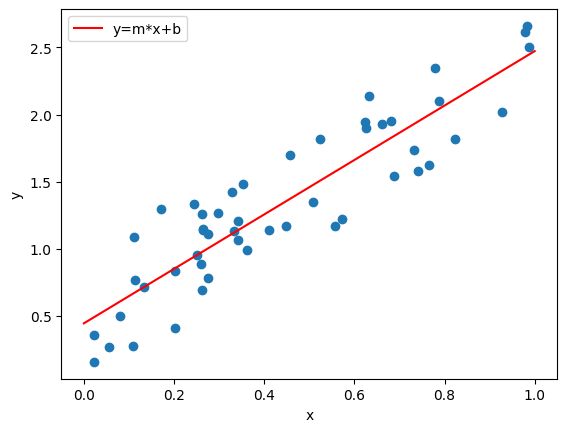

In [44]:
m = (np.corrcoef(x,y)[0][1] * np.std(y)) / np.std(x)
b = np.mean(y) - m * np.mean(x)

line =  m * x + b
x_lin = np.linspace(0,1,100)
line =  m * x_lin + b
plt.plot(x_lin, line, '-r', label='y=m*x+b');
plt.scatter(x, y);
plt.xlabel("x");
plt.ylabel("y");
plt.legend();